In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt

## 1. Channel Distortion
#### 1.1

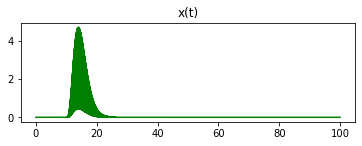

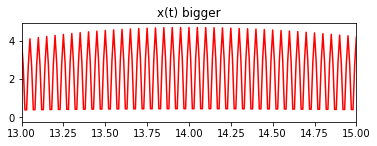

In [269]:
ts = 0.01
sr = 1/ts
t = np.arange(0,100,ts)
T0 = 10
f0 = 10
x = ((t - T0)**4)*np.exp(-(t-T0))*(np.cos(2*np.pi*f0*(t-T0))**2)*np.heaviside(t-T0,1)
#x = (1 + k*np.cos(2*np.pi*t*T0))
#x = (t - T0)**4
#x = np.cos(2*np.pi*f0*t)
plt.subplot(2 , 1 , 1)
plt.plot(t, x, color='green')
plt.title('x(t)')
plt.show()
plt.subplot(2 , 1 , 2)
plt.plot(t, x, color='red')
plt.xlim(13, 15)
plt.title('x(t) bigger')
plt.show()


#### 1.2
The channel has linear magnitude distortion

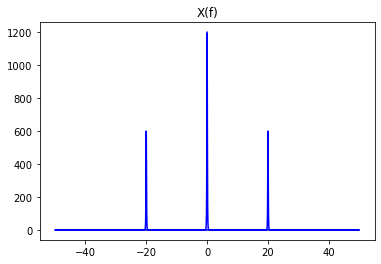

In [270]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = sr * 100
N = int(N)

X = fft(x)
frq = fftfreq(N, 1 / sr)

plt.plot(frq, np.abs(X) , color = 'blue')
plt.title('X(f)')
plt.show()

#plt.phase_spectrum(H, color ='green') 

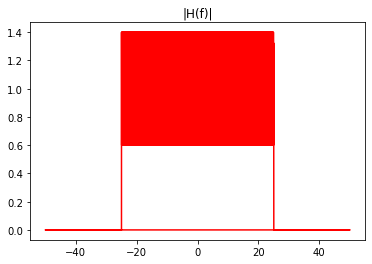

Text(0.5, 1.0, 'phase H(f)')

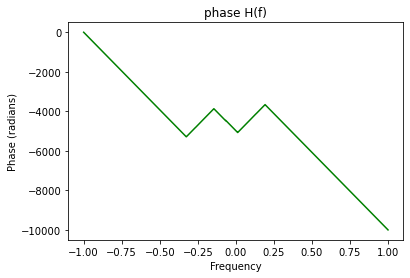

In [272]:
td = (T0)/3
k = 0.4
B = 25
H1 = (1 + k*np.cos(2*np.pi*frq*T0))*np.exp((-1j)*2*np.pi*frq*td)
H = H1 * (np.heaviside(frq+B , 1) - np.heaviside(frq-B  , 1))
plt.plot(frq, np.abs(H) , color = 'red')
plt.title('|H(f)|')
#plt.xlim(0 , 2)
plt.show()

plt.phase_spectrum(H, color ='green') 
plt.title('phase H(f)')

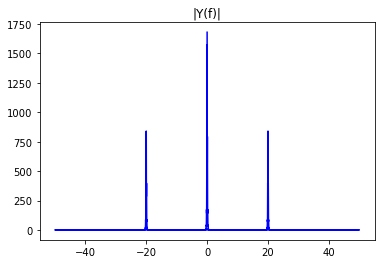

Text(0.5, 1.0, 'phase Y(f)')

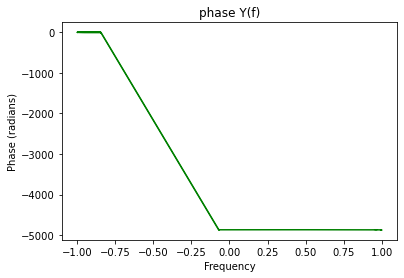

In [273]:
Y = X*H
plt.plot(frq, np.abs(Y) , color = 'blue')
#plt.xlim(0 , 2)
plt.title('|Y(f)|')
plt.show()
plt.phase_spectrum(Y, color ='green') 
plt.title('phase Y(f)')

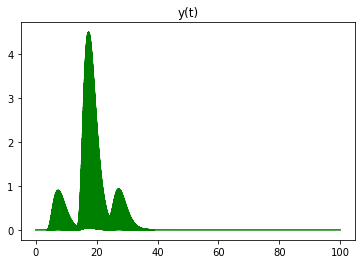

In [275]:
y = ifft(Y)
plt.plot(t, np.abs(y), 'green')
plt.title('y(t)')
#plt.xlim(0 , 40)
plt.show()
#plt.phase_spectrum(y, color ='green') 

#### 1.3
$Y(f) - \alpha e^{-j 2 \pi f T_0} Y(f) - \beta e^{-j 4 \pi f T_0} Y(f) =X(f)   \rightarrow   \big(1 -\alpha e^{-j 2 \pi f T_0} - \beta e^{-j 4 \pi f T_0} \big) Y(f) = X(f)\\ $

$H(f) = \frac{Y(f)}{X(f)} = \frac{1}{1 -\alpha e^{-j 2 \pi f T_0} - \beta e^{-j 4 \pi f T_0} }$

#### 1.4

In [303]:
np.random.seed(400100973)
def my_distribution(x):
    fx = x*np.exp((-(x**2))/2)*np.heaviside(x,1)
    return fx

random_numbers = np.random.uniform(0 , 1 , 3)
betha = my_distribution(random_numbers)
print(betha)

[0.59252486 0.23551334 0.44282996]


In [331]:
alpha = 0.3
H1_3_1 = 1/(1 - (alpha*np.exp((-1j)*2*np.pi*frq*T0)) - (betha[0]*np.exp((-1j)*4*np.pi*frq*T0)))
Y1_3_1 = X*H1_3_1

H1_3_2 = 1/(1 - (alpha*np.exp((-1j)*2*np.pi*frq*T0)) - (betha[1]*np.exp((-1j)*4*np.pi*frq*T0)))
Y1_3_2 = X*H1_3_2

H1_3_3 = 1/(1 - (alpha*np.exp((-1j)*2*np.pi*frq*T0)) - (betha[2]*np.exp((-1j)*4*np.pi*frq*T0)))
Y1_3_3 = X*H1_3_3

y1_3_1 = ifft(Y1_3_1)
y1_3_2 = ifft(Y1_3_2)
y1_3_3 = ifft(Y1_3_3)

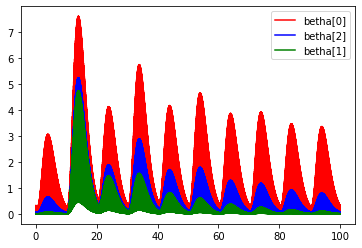

In [312]:
plt.plot(t,np.abs(y1_3_1) , color='r', label="betha[0]") 
plt.plot(t, np.abs(y1_3_3), color='b', label='betha[2]')
plt.plot(t, np.abs(y1_3_2), color='g', label='betha[1]') 
  
# Naming the x-axis, y-axis and the whole graph 

  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show() 

#### 1.5

[0.21866836 0.59612836 0.12130022 0.60297487 0.60005027 0.25489796
 0.01265768 0.4915564  0.55446371 0.23832544]


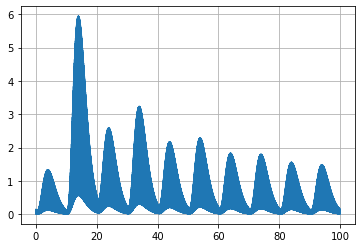

In [330]:
Num = 10
random_numbers = np.random.uniform(0 , 1 , Num)
betha = my_distribution(random_numbers)
print(betha)
Hs = np.zeros((1 , Num))
Ys = np.zeros((1 , Num))
ys = np.zeros((1 , Num))
s = 0

for i in range(Num):
    Hs = 1/(1 - (alpha*np.exp((-1j)*2*np.pi*frq*T0)) - (betha[i]*np.exp((-1j)*4*np.pi*frq*T0)))
    Ys = X*Hs
    ys = ifft(Ys)
    s = s + ys
avg = s/Num
plt.plot(t , np.abs(avg))
plt.grid()
plt.show()

[0.11338946 0.56670618 0.44416263 0.05957158 0.43563777 0.49178608
 0.56947044 0.21327596 0.45080791 0.11042497 0.25408368 0.52974979
 0.21868657 0.11763014 0.56465259 0.25552244 0.56906946 0.47307158
 0.48301235 0.37705501 0.21468904 0.59728697 0.60421323 0.16519281
 0.49250921 0.47440122 0.1547052  0.23176916 0.52543525 0.58077092
 0.51272199 0.58228712 0.57789439 0.47416087 0.18712044 0.37550099
 0.43166428 0.57605881 0.59938553 0.51675303 0.49807314 0.19155981
 0.57504392 0.40403785 0.47149716 0.60648899 0.60641542 0.3265683
 0.49751767 0.6058331 ]


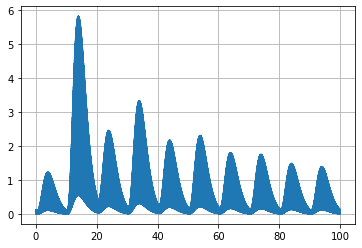

In [329]:
Num = 50
random_numbers = np.random.uniform(0 , 1 , Num)
betha = my_distribution(random_numbers)
print(betha)
Hs = np.zeros((1 , Num))
Ys = np.zeros((1 , Num))
ys = np.zeros((1 , Num))
s = 0

for i in range(Num):
    Hs = 1/(1 - (alpha*np.exp((-1j)*2*np.pi*frq*T0)) - (betha[i]*np.exp((-1j)*4*np.pi*frq*T0)))
    Ys = X*Hs
    ys = ifft(Ys)
    s = s + ys
avg = s/Num
plt.plot(t , np.abs(avg))
plt.grid()
plt.show()

[0.53047272 0.42011807 0.59858714 0.29774032 0.13483689 0.12734672
 0.02295165 0.38929254 0.60056011 0.16462203 0.46333558 0.48493136
 0.22612214 0.03351524 0.54425259 0.26829654 0.51763496 0.26376433
 0.41066058 0.20441322 0.4888276  0.27763025 0.588117   0.32970335
 0.26102485 0.23161069 0.20437005 0.59063161 0.19568512 0.21474068
 0.08816274 0.60508214 0.51747907 0.60130975 0.60624782 0.58545913
 0.40060469 0.50740966 0.40970493 0.60281204 0.33803411 0.51094133
 0.56244792 0.01540232 0.60120813 0.5894951  0.60413509 0.05313716
 0.08046931 0.56890327 0.55203758 0.50647398 0.30886274 0.5715876
 0.05499214 0.44863609 0.48687159 0.22480243 0.5728172  0.54875581
 0.59703368 0.48516172 0.5150423  0.5959977  0.24143296 0.04217086
 0.23393818 0.41059676 0.50888701 0.42332999 0.16210429 0.52939906
 0.0638525  0.50204528 0.30500832 0.38101177 0.18937035 0.34389123
 0.4339146  0.60472983 0.244055   0.37008942 0.08159766 0.20745081
 0.44114968 0.3959013  0.34320296 0.21546228 0.47672985 0.55760

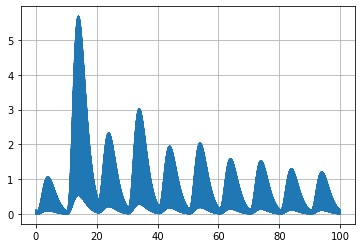

In [328]:
Num = 100
random_numbers = np.random.uniform(0 , 1 , Num)
betha = my_distribution(random_numbers)
print(betha)
Hs = np.zeros((1 , Num))
Ys = np.zeros((1 , Num))
ys = np.zeros((1 , Num))
s = 0

for i in range(Num):
    Hs = 1/(1 - (alpha*np.exp((-1j)*2*np.pi*frq*T0)) - (betha[i]*np.exp((-1j)*4*np.pi*frq*T0)))
    Ys = X*Hs
    ys = ifft(Ys)
    s = s + ys
avg = s/Num
plt.plot(t , np.abs(avg))
plt.grid()
plt.show()

[0.53825245 0.33674758 0.00314692 0.52424214 0.39395006 0.04939126
 0.5268593  0.59471018 0.34019447 0.50400809 0.55537238 0.60380539
 0.59132816 0.19312274 0.58721338 0.35743781 0.51716905 0.55121589
 0.54167789 0.32202368 0.34528135 0.36828461 0.3801475  0.5808229
 0.56904485 0.57746744 0.13970358 0.60378582 0.40556008 0.12785103
 0.42654223 0.26694277 0.54632328 0.22615747 0.33096803 0.60276286
 0.46241092 0.25299555 0.28013858 0.42179198 0.53615252 0.48614904
 0.58464583 0.20349845 0.44625488 0.57197717 0.35110002 0.5682682
 0.2213653  0.24721263 0.28591434 0.57570413 0.38945573 0.51820142
 0.06209739 0.12886512 0.27067232 0.41247455 0.41254707 0.22591157
 0.18128596 0.29162209 0.55266074 0.59508034 0.33802758 0.35415901
 0.39840277 0.12217075 0.54396714 0.06064893 0.5607437  0.58593919
 0.54608432 0.39152937 0.60652506 0.26237172 0.53845289 0.29703486
 0.60556432 0.09976377 0.57532002 0.55802748 0.41325277 0.6064299
 0.03869602 0.58816024 0.19040689 0.13992772 0.52146322 0.6064830

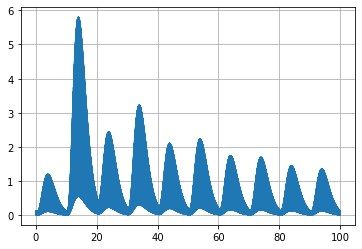

In [327]:
Num = 200
random_numbers = np.random.uniform(0 , 1 , Num)
betha = my_distribution(random_numbers)
print(betha)
Hs = np.zeros((1 , Num))
Ys = np.zeros((1 , Num))
ys = np.zeros((1 , Num))
s = 0

for i in range(Num):
    Hs = 1/(1 - (alpha*np.exp((-1j)*2*np.pi*frq*T0)) - (betha[i]*np.exp((-1j)*4*np.pi*frq*T0)))
    Ys = X*Hs
    ys = ifft(Ys)
    s = s + ys
avg = s/Num
plt.plot(t , np.abs(avg))
plt.grid()
plt.show()

#### 1.6
the output of the channel is sum of shifted inputs with different magnitudes.

## 2. Signal Recovery

#### 2.1
$H_{eq}(f) = \frac{k e^{-j2\pi f t_0}}{H_c (f)} = k e^{-j2\pi f t_0} \big(1 -\alpha e^{-j 2 \pi f T_0} - \mathbb{E}(\beta) e^{-j 4 \pi f T_0}\big)\\$
$\hat{X_m}(f) = Y(f)H_{eq}(f) \rightarrow \hat{X_m}(f) = k e^{-j2\pi f t_0} \big(1 -\alpha e^{-j 2 \pi f T_0} - \mathbb{E}(\beta) e^{-j 4 \pi f T_0}\big) Y(f)$

$\hat{x_m}(t) = k y(t-t_0) - k\alpha y(t - T_0 - t_0) - k\mathbb{E}(\beta) y(t - 4T0 - t_0)$

It is like a m-Tapped-Delay Line Equalizer that:

$C_1 = 1 , C_2 = -k\alpha , C_3 = k\mathbb{E}(\beta)\\$
$o.w : C_i = 0$

$T1 = 0\\$
$o.w :  T_i = T_0$

#### 2.2
$Y(f) = X(f) + 0.3 e^{-j2\pi f} X(f) \rightarrow Y(f) = \big(1 + 0.3e^{-j2\pi f} \big) X(f) \rightarrow  H_c(f) = 1 + 0.3e^{-j2\pi f}\\$
$H_{eq}(f) = \frac{k e^{-j2\pi f t_0}}{H_c(f)} = \frac{k e^{-j2\pi f t_0}}{1 + 0.3e^{-j2\pi f}}$

Taylor series for $\frac{1}{x}$ equals $\sum_{n=0}^\infty (-1)^n x^n$ if $|x| < 1$ $\\$
so for $H_{eq}(f)$ we have :

$H_{eq}(f) = \frac{k e^{-j2\pi f t_0}}{H_c(f)} = \frac{k e^{-j2\pi f t_0}}{1 + 0.3e^{-j2\pi f}} = k e^{-j2\pi f t_0} \big(1 - 0.3 e^{-j2\pi f T_0} + (0.3)^2 e^{-j2\pi f 2T_0} - (0.3)^3 e^{-j2\pi f 3T_0} + \cdots \big)\\$
$H_{eq}(f) = k e^{-j2\pi f t_0} \big(\sum_{m=0}^M (-0.4)^m e^{-j2\pi f T_0} \big)$

$C_m = k(-0.4)^m\\$
$T_m = T_0$

We also should put an extra delay block at the start with delay amount of t_0 and then give y(t - t_0) to the rest of Equalizer

#### 2.3

In [41]:
import numpy as np
ts = 0.01
sr = 1/ts
t = np.arange(0,100,ts)
T0 = 10
f0 = 10
x = ((t - T0)**4)*np.exp(-(t-T0))*(np.cos(2*np.pi*f0*(t-T0))**2)*np.heaviside(t-T0,1)
xp = ((t - 2*T0)**4)*np.exp(-(t-2*T0))*(np.cos(2*np.pi*f0*(t-2*T0))**2)*np.heaviside(t-2*T0,1)
y = x + 0.3*xp

0.0019375453124999937
0.00017437907812499614
1.5694117017382193e-05
1.4094511722334795e-06
9.06895703393563e-33
9.06895703393563e-33
9.06895703393563e-33
9.06895703393563e-33
[1.93754531e-03 1.74379078e-04 1.56941170e-05 1.40945117e-06
 9.06895703e-33 9.06895703e-33 9.06895703e-33 9.06895703e-33]


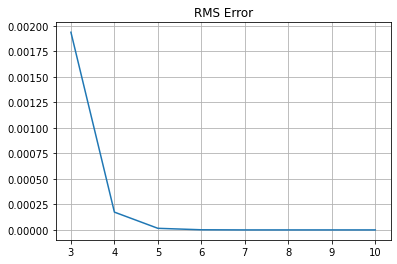

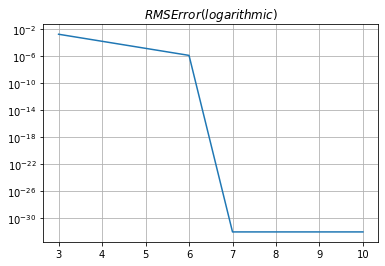

In [79]:
from scipy.integrate import quad 
y_hat = ((t - T0 - t0)**4)*np.exp(-(t-T0 - t0))*(np.cos(2*np.pi*f0*(t-T0-t0))**2)*np.heaviside(t-T0-t0,1)
errors = np.array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.])
i = 0
for M in range(3 , 11):
    x1 = 0
    for m in range(M+1):
        x1 = x1 + ((-0.3)**m)*(((t - T0- t0 - m*T0)**4)*np.exp(-(t-T0-t0-m*T0))*(np.cos(2*np.pi*f0*(t-T0-t0-m*T0))**2)*np.heaviside(t-T0-t0-m*T0,1) + 0.3*(((t - 2*T0-t0 - m*T0)**4)*np.exp(-(t-2*T0-m*T0-t0))*(np.cos(2*np.pi*f0*(t-2*T0-m*T0-t0))**2)*np.heaviside(t-2*T0-m*T0-t0,1)))
    my_function = np.abs(x1 - y_hat)**2
    err = np.trapz(my_function, t)
    errors[i] = err
    print(err)
    i = i+1
print(errors)
M_s = np.array([3 , 4 , 5 , 6 , 7 , 8 , 9 , 10])
plt.plot(M_s , errors)
plt.title('RMS Error')
plt.grid()
plt.show()

plt.plot(M_s , errors)
plt.title('$RMS Error(logarithmic)$')
plt.yscale('log')
plt.grid()
plt.show()

#### 2.4

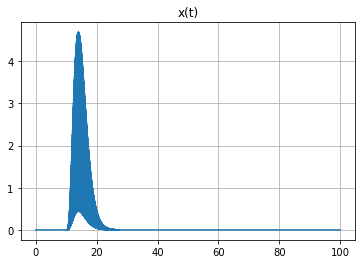

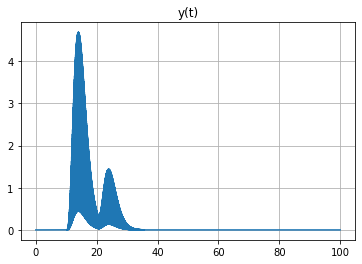

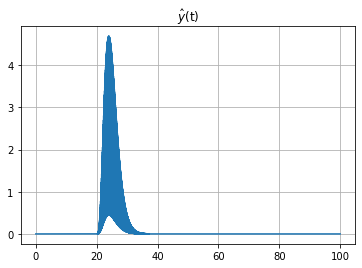

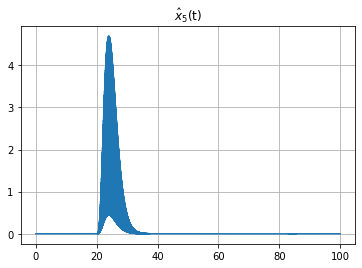

In [57]:
M1 = 5
x1 = 0
t0 = T0
#y = ((t - T0)**4)*np.exp(-(t-T0))*(np.cos(2*np.pi*f0*(t-T0))**2)*np.heaviside(t-T0,1) + 0.3*(xp = ((t - 2*T0)**4)*np.exp(-(t-2*T0))*(np.cos(2*np.pi*f0*(t-2*T0))**2)*np.heaviside(t-2*T0,1))
errors = np.zeros((1 , 8))
y_hat = ((t - T0 - t0)**4)*np.exp(-(t-T0 - t0))*(np.cos(2*np.pi*f0*(t-T0-t0))**2)*np.heaviside(t-T0-t0,1)
for m in range(M1+1):
     x1 = x1 + ((-0.3)**m)*(((t - T0- t0 - m*T0)**4)*np.exp(-(t-T0-t0-m*T0))*(np.cos(2*np.pi*f0*(t-T0-t0-m*T0))**2)*np.heaviside(t-T0-t0-m*T0,1) + 0.3*(((t - 2*T0-t0 - m*T0)**4)*np.exp(-(t-2*T0-m*T0-t0))*(np.cos(2*np.pi*f0*(t-2*T0-m*T0-t0))**2)*np.heaviside(t-2*T0-m*T0-t0,1)))  
plt.plot(t , x)
plt.title('x(t)')
plt.grid()
plt.show()    

plt.plot(t , y)
plt.title('y(t)')
plt.grid()
plt.show()

plt.plot(t , y_hat)
plt.title('$\hat{y}$(t)')
plt.grid()
plt.show()

plt.plot(t , x1)
plt.title('$\hat{x}_5$(t)')
plt.grid()
plt.show()
